# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [4]:
apple = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv")

### Step 3. Assign it to a variable apple

In [5]:
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [6]:
apple.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
8464,1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45


### Step 4.  Check out the type of the columns

In [7]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


### Step 5. Transform the Date column as a datetime type

In [8]:
apple.Date = pd.to_datetime(apple.Date)
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8465 non-null   datetime64[ns]
 1   Open       8465 non-null   float64       
 2   High       8465 non-null   float64       
 3   Low        8465 non-null   float64       
 4   Close      8465 non-null   float64       
 5   Volume     8465 non-null   int64         
 6   Adj Close  8465 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 463.1 KB


### Step 6.  Set the date as the index

In [9]:
apple.set_index("Date", inplace=True)

In [10]:
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 7.  Is there any duplicate dates?

In [11]:
print(apple.duplicated().values.any())
duplicated_rows = apple[apple.duplicated()]
duplicated_rows

False


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,


### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [12]:
apple.sort_index(ascending=True, inplace=True)
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


### Step 9. Get the last business day of each month

In [13]:
bussiness_days = pd.date_range(start=apple.index.min(),end=apple.index.max(), freq="b")

In [14]:
# check if the day is Friday and is the end of the month
last_bd = [str(date.date()) for date in bussiness_days[(bussiness_days.weekday == 4) & (bussiness_days.is_month_end)]]
last_bd

['1981-01-30',
 '1981-02-27',
 '1981-05-29',
 '1981-07-31',
 '1981-10-30',
 '1982-01-29',
 '1982-02-26',
 '1982-04-30',
 '1982-07-30',
 '1982-10-29',
 '1982-12-31',
 '1983-04-29',
 '1983-07-29',
 '1983-09-30',
 '1983-12-30',
 '1984-03-30',
 '1984-06-29',
 '1984-08-31',
 '1984-09-28',
 '1984-11-30',
 '1985-03-29',
 '1985-05-31',
 '1985-06-28',
 '1985-08-30',
 '1985-11-29',
 '1986-01-31',
 '1986-02-28',
 '1986-05-30',
 '1986-08-29',
 '1986-10-31',
 '1986-11-28',
 '1987-01-30',
 '1987-02-27',
 '1987-05-29',
 '1987-07-31',
 '1987-10-30',
 '1988-01-29',
 '1988-04-29',
 '1988-07-29',
 '1988-09-30',
 '1988-12-30',
 '1989-03-31',
 '1989-04-28',
 '1989-06-30',
 '1989-09-29',
 '1989-12-29',
 '1990-03-30',
 '1990-06-29',
 '1990-08-31',
 '1990-09-28',
 '1990-11-30',
 '1991-03-29',
 '1991-05-31',
 '1991-06-28',
 '1991-08-30',
 '1991-11-29',
 '1992-01-31',
 '1992-02-28',
 '1992-05-29',
 '1992-07-31',
 '1992-10-30',
 '1993-01-29',
 '1993-02-26',
 '1993-04-30',
 '1993-07-30',
 '1993-10-29',
 '1993-12-

### Step 10.  What is the difference in days between the first day and the oldest

In [15]:
apple.index.max() - apple.index.min() 

Timedelta('12261 days 00:00:00')

### Step 11.  How many months in the data we have?

In [16]:
end_date = apple.index.max()
start_date = apple.index.min()
num_months = (end_date.year - start_date.year) * 12 + (end_date.month - start_date.month)

print(num_months)

403


### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

In [17]:
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


In [18]:
apple["Adj Close"].min()

0.17

In [19]:
apple["Adj Close"].max()

96.28

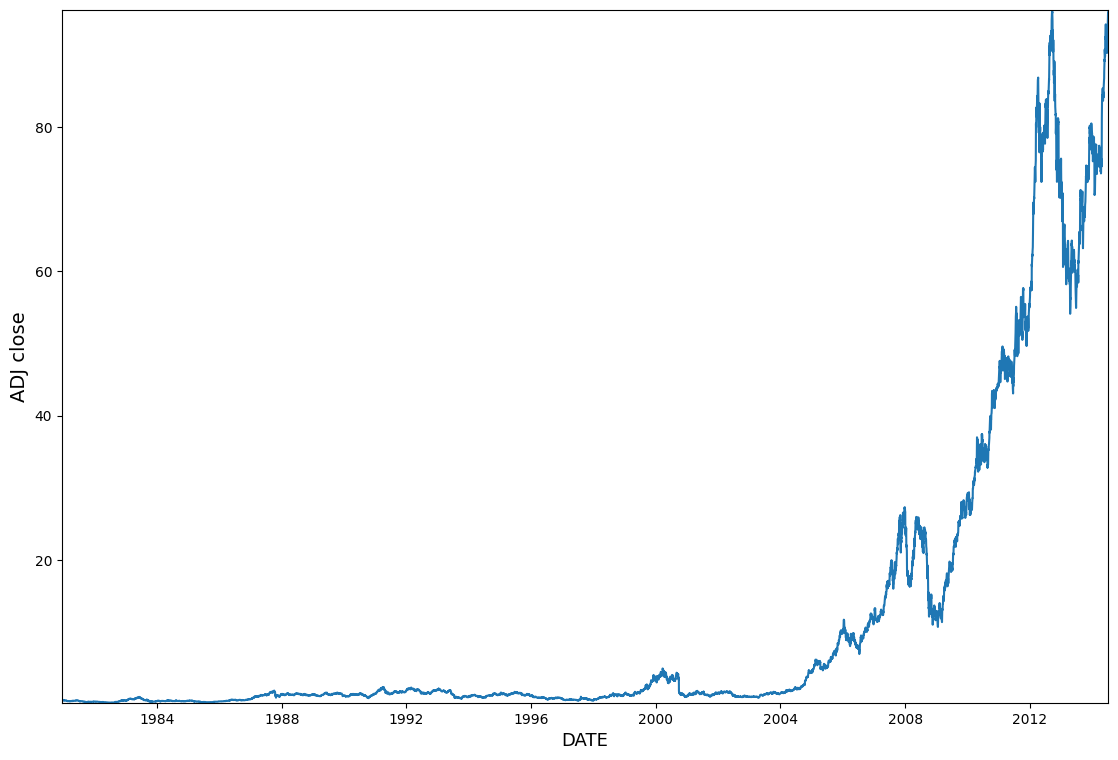

In [40]:
plt.figure(figsize=(13.5, 9))
plt.plot(apple.index, apple["Adj Close"])
plt.xlabel("DATE", size=13)
plt.ylabel("ADJ close", size=14)
plt.yticks(np.arange(0, apple["Adj Close"].max(), 20))
plt.margins(0)
plt.show()

### BONUS: Create your own question and answer it.